In [10]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import linear_model
%matplotlib inline

In [5]:
data_path = './optiver/data'
files = list(sorted([f for f in listdir(data_path)]))

In [55]:
df_daily = []
df_50_days = pd.DataFrame()

for idx, file in enumerate(files):
    df = pd.read_csv(join(data_path, file), parse_dates=['times'], index_col=['times'])
    #df = df.resample('1T').mean()
    df_daily.append(df)
    df_50_days = df_50_days.append(df)

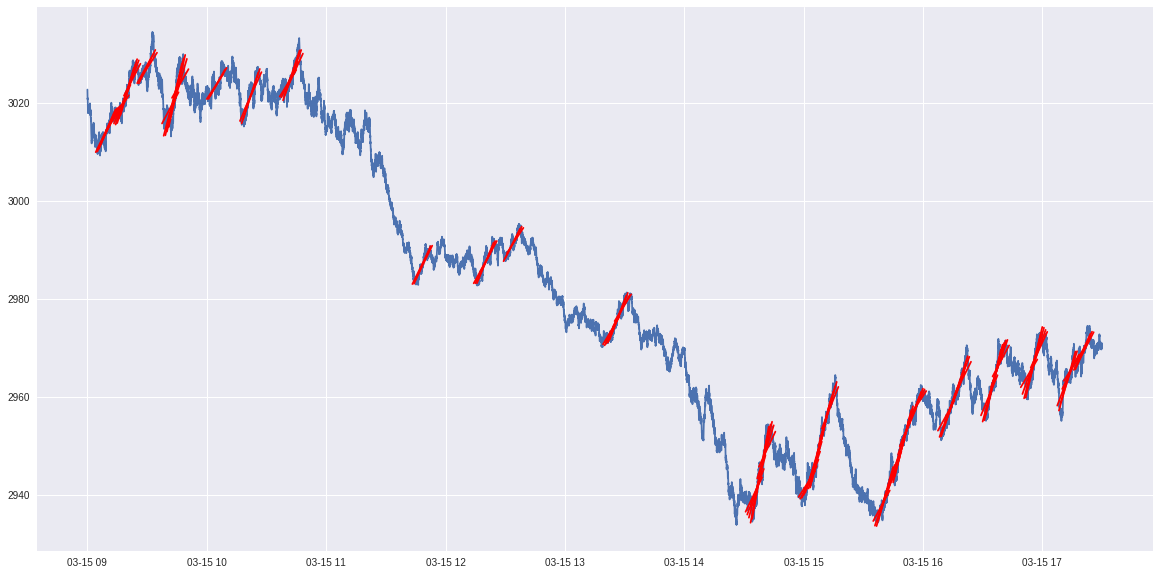

In [78]:
fig, ax = plt.subplots(figsize=(20,10))
day = df_daily[0]
window_size = 500
lr = linear_model.LinearRegression()
x = list(range(window_size))
values =  day.price.values
ax.plot(day.index.values, day.price.values)
for i in range(0, len(day) - window_size, 50):
    y = values[i:i+window_size]
    x2 = np.array([x]).T
    lr.fit(x2, y)
    if lr.coef_ > 0.01:
        pred = lr.predict(x2)
        ax.plot(day[i:i+window_size].index.values, pred, color='r')

<Container object of 27 artists>

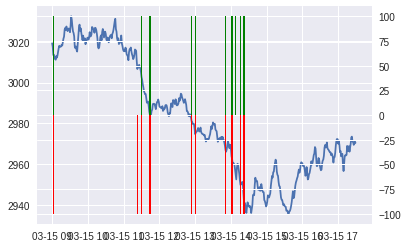

In [71]:
fig, ax1 = plt.subplots()
ax1.plot(df_daily[0].index.values, df_daily[0].price.values)

date = df_daily[0].index[0].date()
orders_all = orders.loc[str(date)].dropna()
orders_buy.loc[(orders_all.trades < 0)] = 0
orders_sale = orders_all.loc[orders_all.trades < 0]

width = 0.0005
ax2 = ax1.twinx()
ax2.bar(orders_buy.index.values, orders_buy.trades.values, width=width, color='g')
ax2.bar(orders_sale.index.values, orders_sale.trades.values, width=width, color='r')

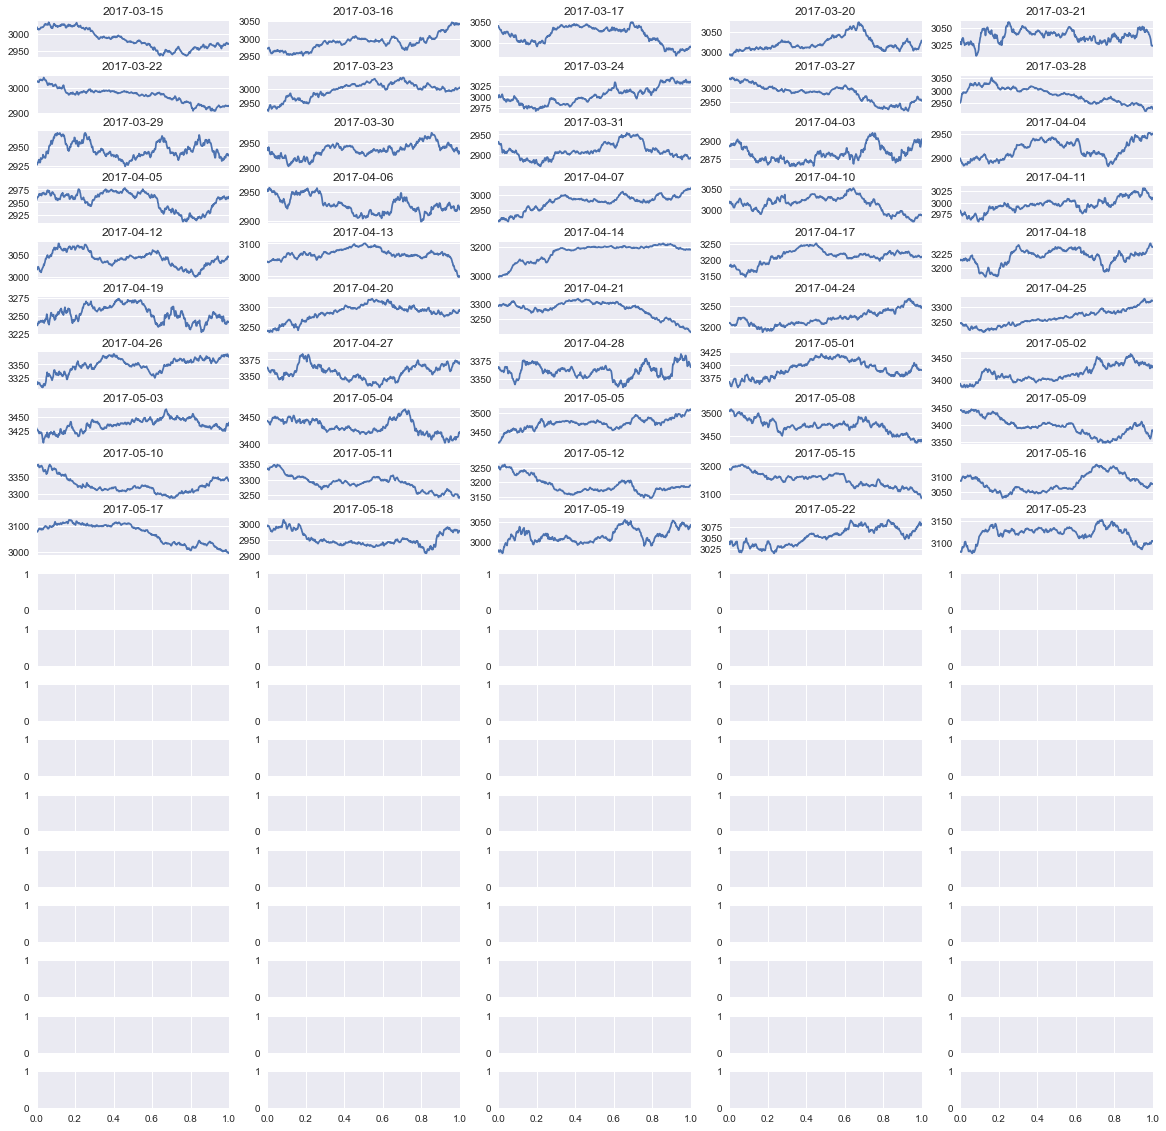

In [9]:
fig, ax_arr = plt.subplots(nrows=20, ncols=5, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
for idx, file in enumerate(files):
    df_daily[idx].price.plot(ax=ax_arr[idx // 5, idx % 5], sharex=True)
    ax_arr[idx // 5, idx % 5].set_title(file.split('_')[0])

In [ ]:
fig, axes = plt.subplots(figsize=(25, 5))
for i in range(50):
    plt.axvline(x=i * 30600, color='k', lw=0.5)
df_50_days.price.plot(ax=axes, use_index=False)